In [3]:
import os
import sys
sys.path.insert(0, '../')
import ccal
%matplotlib inline
# %config InlineBackend.figure_formats = {'svg',}

import numpy as np
import pandas as pd

# Get states

In [4]:
h = ccal.support.read_gct('/home/cyborg/hematopoietic_cancer/result/ccle_hema_r/k9/ccle_hema_k_9_H.gct')
n_states_to_explore = [10, 25, 30]
nclustering = 1000
states_filename = 'ccle_hema_k_9_H_1000clustering_10_25_30.txt' 

In [3]:
labels, cophenetic_correlation = ccal.analyze.get_states_from_h(h, n_states_to_explore, nclustering=nclustering, filename=states_filename)

<14:32:05> Comparing A3KAW_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE (1/166) vs. ...
<14:32:05> Comparing A4FUK_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE (2/166) vs. ...
<14:32:06> Comparing ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE (3/166) vs. ...
<14:32:06> Comparing AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE (4/166) vs. ...
<14:32:07> Comparing AMO1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE (5/166) vs. ...
<14:32:07> Comparing BCP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE (6/166) vs. ...
<14:32:08> Comparing BDCM_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE (7/166) vs. ...
<14:32:08> Comparing BL41_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE (8/166) vs. ...
<14:32:09> Comparing BL70_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE (9/166) vs. ...
<14:32:09> Comparing BV173_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE (10/166) vs. ...
<14:32:10> Comparing CA46_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE (11/166) vs. ...
<14:32:10> Comparing CI1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE (12/166) vs. ...
<14:32:11> Comparing CMK_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE (13/166

# Map Onco GPS

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

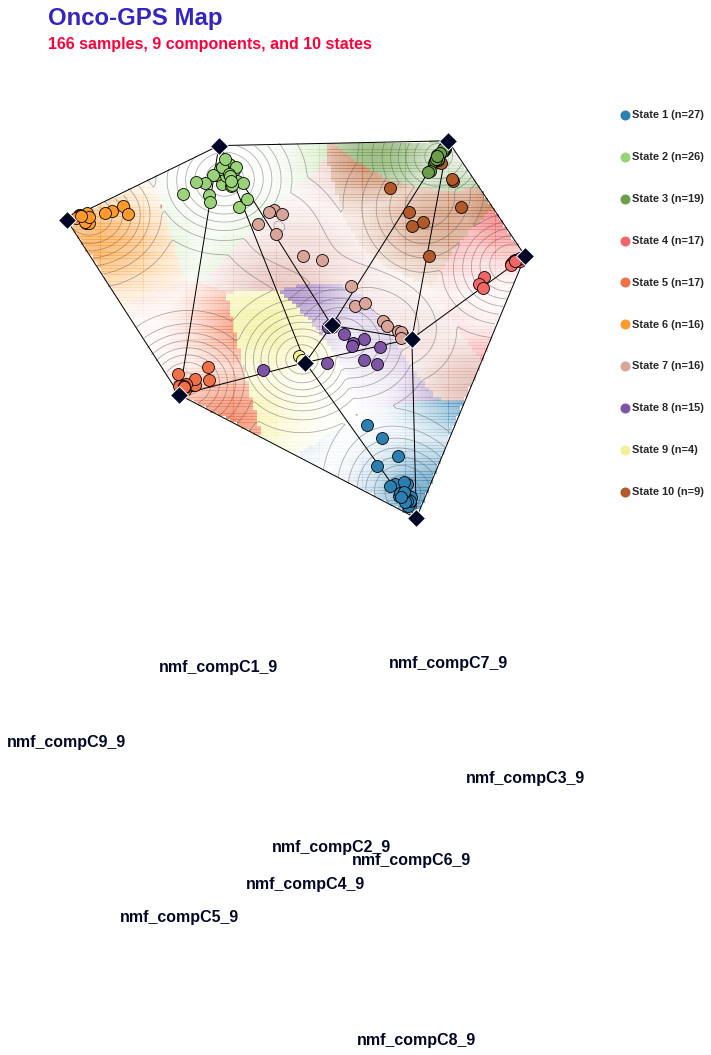

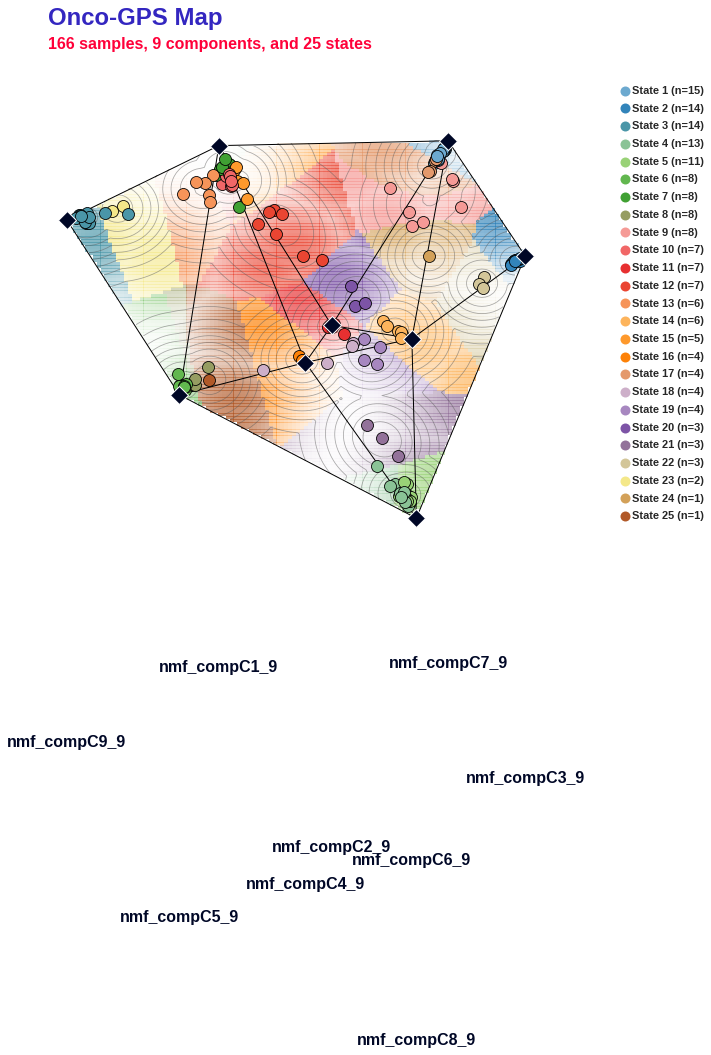

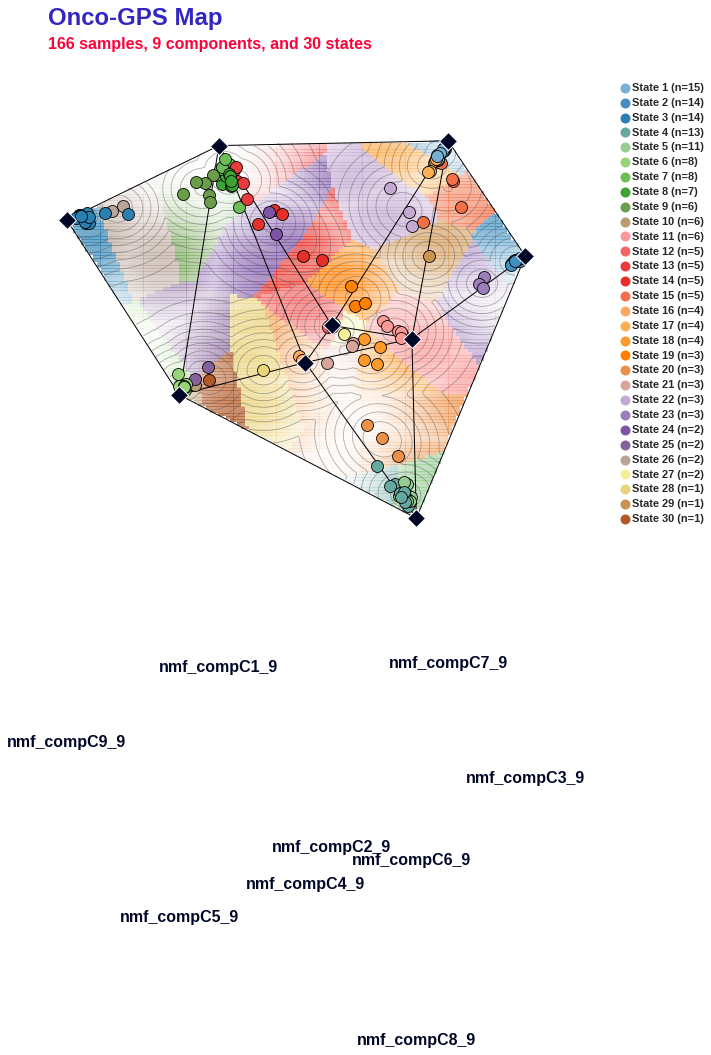

In [8]:
labels = pd.read_csv(states_filename, index_col=0, sep='\t')
annotations = np.random.random_sample(labels.shape[1] - 1)
for n_state in n_states_to_explore:
    states = labels.ix[n_state, :-1].astype(int).tolist()
    ccal.visualize.plot_onco_gps(h, n_state, states, output_filename='ccle_hema_k_9_H_1000clustering_s{}_random_annotation.pdf'.format(n_state), mds_metric=False)
    #ccal.visualize.plot_onco_gps(h, n_state, states, output_filename='ccle_hema_k_9_H_1000clustering_s{}.pdf'.format(n_state))